### Libraries

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

### Chunking CSV to upload onto GitHub

import pandas as pd

chunk_size = 55000
batch_no = 1

for chunk in pd.read_csv('221100_DayZ.csv', chunksize=chunk_size):
    #chunk.to_csv('221100_DayZ' + str(batch_no) + '.csv', index=False)
    #batch_no +=1

### Dataset

In [2]:
steamData = pd.read_csv('steam_data/steam.csv')
steamSupportInfo = pd.read_csv('steam_data/steam_support_info.csv')
steamChart = pd.read_csv('steam_data/steamCharts.csv')
steamSpyTagData = pd.read_csv('steam_data/steamspy_tag_data.csv')
steamGames = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_games/steam_games*.csv"))))
steamMediaData = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_media_data/steam_media_data*.csv"))))
steamRequirements = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_requirements/steam_requirements*.csv"))))
steamDescription = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_description/steam_description*.csv"))))

#game reviews
steam_HalfOfTheGameReviews = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))))
files = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
steamReviews_fromFolder = pd.concat([pd.read_csv(f) for f in files ])
steamReviewsDF = [steam_HalfOfTheGameReviews, steamReviews_fromFolder]
steamCombinedReviews = pd.concat(steamReviewsDF)

C:\Users\Pyae Pyae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Pyae Pyae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Pyae Pyae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Pyae Pyae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Cleaning the Dataset

In [3]:
#rename for easier identification
steamGames = steamGames.rename(columns={"name": "title"})

#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamCombinedReviews['title'] = hero.clean(steamCombinedReviews['title'], pipeline = custom_pipeline)
steamGames['title'] = hero.clean(steamGames['title'], pipeline = custom_pipeline)

##### Getting title, genre and release date

In [4]:
#getting title and genre from steamGames df
steamGames_Title_Genre = steamGames[['title', 'genre', 'release_date']]

#getting title and review from steamCombinedReviews df
steamCombinedReviews_Title_Reviews = steamCombinedReviews[['title', 'review']]

##### matching title in steamGames with steamCombinedReview

In [5]:
matchTitle = steamGames_Title_Genre.title.isin(steamCombinedReviews_Title_Reviews.title)
steamMatchTitle = steamGames_Title_Genre[matchTitle]

##### dropping duplicate values

In [6]:
steamUniqueTitle = steamMatchTitle.drop_duplicates(['title'])
steamUniqueTitle = steamUniqueTitle.reset_index(drop=True)

steamUniqueTitle
nan_value = float("NaN")
steamUniqueTitle.replace("", nan_value, inplace=True)
steamUniqueTitle.info()

steamUniqueTitle.dropna(subset = ["genre"], inplace=True)
steamUniqueTitle
steamUniqueTitle.to_excel("output.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         141 non-null    object
 1   genre         141 non-null    object
 2   release_date  140 non-null    object
dtypes: object(3)
memory usage: 3.5+ KB


##### remove values that we don't use

In [7]:
#steamUniqueTitle.to_excel("output.xlsx")

In [8]:
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Early Access?', '')
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Massively Multiplayer?', '')
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace('Massively Multiplayer,?', '')
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Free to Play?', '')
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace('Free to Play,?', '')

steamUniqueTitle['release_date'] = steamUniqueTitle.release_date.str.replace('Early Access' , '')
steamUniqueTitle['release_date'] = steamUniqueTitle.release_date.str.replace('Coming Soon' , '')
steamUniqueTitle['release_date'] = steamUniqueTitle.release_date.str.replace('To Be Announced' , '')

steamUniqueTitle

<ipython-input-8-05f07500e16f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Early Access?', '')
<ipython-input-8-05f07500e16f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Massively Multiplayer?', '')
<ipython-input-8-05f07500e16f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace('Massively Multiplayer,?', '')
<ipython-input-8-05f07500e16f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Free to Play?', '')
<ipython-input-8-05f07500e16f>:5: FutureWarning: The default value of regex will change from True to False in a future ver

,title,genre,release_date
0,playerunknown s battlegrounds,"Action,Adventure","Dec 21, 2017"
1,battletech,"Action,Adventure,Strategy","Apr 24, 2018"
2,dayz,"Action,Adventure","Dec 13, 2018"
3,human fall flat,"Adventure,Indie","Jul 22, 2016"
4,they are billions,Strategy,"Dec 12, 2017"
...,...,...,...
137,transport fever 2,"Simulation,Strategy",Q4 2019
138,halo the master chief collection,Action,"Dec 4, 2019"
139,fall guys ultimate knockout,"Casual,Indie,Sports",2020
140,mount blade ii bannerlord,"Action,RPG,Simulation,Strategy","Mar 30, 2020"


##### split genre into 6 columns

In [9]:
steamUniqueTitle[['genre1', 'genre2', 'genre3','genre4','genre5','genre6']] = steamUniqueTitle['genre'].str.split(',', expand=True)

##### dropping genre, title, and release date columns to get the total count of genre

In [10]:
steamGenreCount = steamUniqueTitle.drop(columns=['genre','title', 'release_date'])

##### reset index and rename the column

In [11]:
steamGenreGraph = steamGenreCount.stack().value_counts().reset_index()
steamGenreGraph.columns = ['genre','count']
steamGenreGraph

,genre,count
0,Action,74
1,Indie,51
2,Simulation,51
3,Strategy,46
4,Adventure,40
5,RPG,33
6,Sports,7
7,Casual,6
8,Racing,4


##### graph to see which genre is most popular 

<AxesSubplot:xlabel='genre', ylabel='count'>

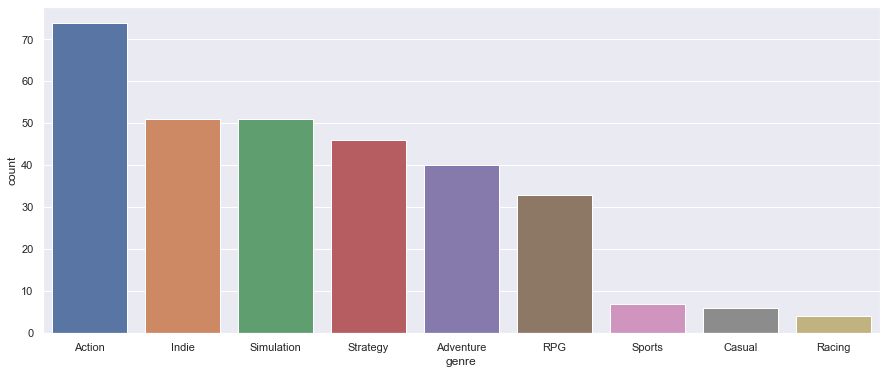

In [12]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x="genre", y="count", data=steamGenreGraph, ax=ax)

we can see that most popular genres are action, indie and simulation

In [13]:
# storing last 4 letters of release_date as year
steamGenre_Date = steamUniqueTitle
steamGenre_Date['year'] = steamGenre_Date['release_date'].str.slice(-4)

#dropping unused columns
steamGenre_Date = steamUniqueTitle.drop(columns=['title', 'genre1', 'genre2', 'genre3','genre4','genre5','genre6'])
steamGenre_Date

,genre,release_date,year
0,"Action,Adventure","Dec 21, 2017",2017
1,"Action,Adventure,Strategy","Apr 24, 2018",2018
2,"Action,Adventure","Dec 13, 2018",2018
3,"Adventure,Indie","Jul 22, 2016",2016
4,Strategy,"Dec 12, 2017",2017
...,...,...,...
137,"Simulation,Strategy",Q4 2019,2019
138,Action,"Dec 4, 2019",2019
139,"Casual,Indie,Sports",2020,2020
140,"Action,RPG,Simulation,Strategy","Mar 30, 2020",2020


##### storing the top 3 genre individually

In [14]:
action =steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("action", case=False)]
indie =steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("indie", case=False)]
simulation = steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("simulation", case=False)]

In [15]:
#options = ['Action','Indie','Simulation']
#options = ['Action']
#test = steamGenre_Date.loc[steamGenre_Date['genre1'].isin(options) | steamGenre_Date['genre2'].isin(options) | steamGenre_Date['genre3'].isin(options)
                          # | steamGenre_Date['genre4'].isin(options) | steamGenre_Date['genre5'].isin(options) | steamGenre_Date['genre6'].isin(options)]


#test

##### converting year to int

In [16]:
action["year"] = pd.to_numeric(action["year"])
indie["year"] = pd.to_numeric(indie["year"])
simulation["year"] = pd.to_numeric(simulation["year"])

action["year"] = action["year"].fillna(0.0).astype(int)
indie["year"] = indie["year"].fillna(0.0).astype(int)
simulation["year"] = simulation["year"].fillna(0.0).astype(int)

action.to_excel("output.xlsx")

<ipython-input-16-50453b4e2ebd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action["year"] = pd.to_numeric(action["year"])
<ipython-input-16-50453b4e2ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indie["year"] = pd.to_numeric(indie["year"])
<ipython-input-16-50453b4e2ebd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

##### dropping rows that has 2020 in "year" column because it is outlier

In [17]:
# Get names of indexes for which column action has value 2020
indexAction = action[action['year'] == 2020].index
# Delete these row indexes from dataFrame
indexAction = action.drop(indexAction , inplace=True)

# Get names of indexes for which indie action has value 2020
indexIndie = indie[indie['year'] == 2020].index
# Delete these row indexes from dataFrame
indexIndie = indie.drop(indexIndie , inplace=True)

# Get names of indexes for which column simulation has value 2020
indexSimulation = simulation[simulation['year'] == 2020].index
# Delete these row indexes from dataFrame
indexIndie = simulation.drop(indexSimulation , inplace=True)


C:\Users\Pyae Pyae\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Pyae Pyae\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Pyae Pyae\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##### grouping data based on year

In [18]:
groupedAction = action.groupby("year").count()
groupedIndie = indie.groupby("year").count()
groupedSimulation = simulation.groupby("year").count()

#reset index
groupedAction.reset_index(inplace=True)
groupedIndie.reset_index(inplace=True)
groupedSimulation.reset_index(inplace=True)

##### rename and convert the count to corresponding genre

In [19]:
groupedAction = groupedAction.rename(columns={'genre': 'action count'})  # old method  
groupedAction['action count'] = groupedAction['action count'].astype(int)

groupedIndie = groupedIndie.rename(columns={'genre': 'indie count'})  # old method  
groupedIndie['indie count'] = groupedIndie['indie count'].astype(int)

groupedSimulation = groupedSimulation.rename(columns={'genre': 'simulation count'})  # old method  
groupedSimulation['simulation count'] = groupedSimulation['simulation count'].astype(int)

#drop "release_date" column
groupedAction = groupedAction.drop(columns=['release_date'])
groupedIndie = groupedIndie.drop(columns=['release_date'])
groupedSimulation = groupedSimulation.drop(columns=['release_date'])


##### merge the top 3 dataframes into one for lineplot

In [20]:
genreTimeLine = groupedAction.merge(groupedIndie,on='year').merge(groupedSimulation,on='year')
genreTimeLine

,year,action count,indie count,simulation count
0,2012,1,2,2
1,2013,3,1,3
2,2014,3,3,3
3,2015,10,5,7
4,2016,10,11,8
5,2017,10,5,4
6,2018,19,13,13
7,2019,11,8,7


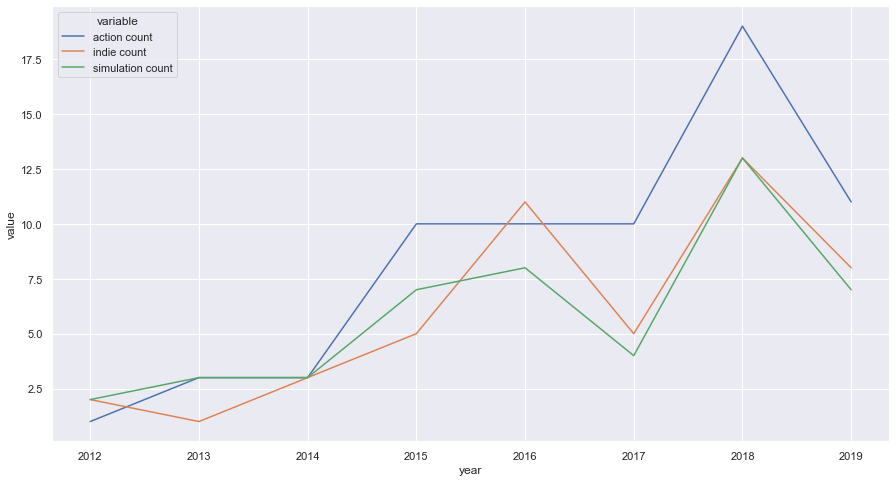

In [21]:
plt.figure(figsize=(15,8))
sb.lineplot(x='year', y='value', hue='variable', 
             data=pd.melt(genreTimeLine, ['year']))

ya = ax.get_yaxis()
ya.set_major_locator(MaxNLocator(integer=True))

xa = ax.get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True))

plt.show()

 We can see that there is a sharp drop in 2019. 
 
 Based on this article, https://gamedaily.biz/article/1489/year-over-year-game-release-numbers-slowed-for-steam-in-2019 , they also said that there is a drop 2019 which is the same as the graph shown above. They mentioned that the drop may be due to the Steam’s notoriously-difficultmarketing and discoverability environment.